In [1]:
!pip install fastai torch --upgrade

!pip install -Uqq fastbook
!pip install fastcore --upgrade

import fastbook
fastbook.setup_book()

In [2]:
import fastbook
import fastcore

from fastbook import *
from fastai.vision import *
from fastai.metrics import error_rate

def init_sample_mnist():
  return untar_data(URLs.MNIST)

path = init_sample_mnist()

In [3]:
def get_mnist_dls(): 
  mnist_full = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
                        get_items=get_image_files_sorted,
                        splitter=RandomSplitter(),
                        get_y=parent_label)

  return mnist_full.dataloaders(path)

dls = get_mnist_dls()

SuggestedLRs(lr_min=0.33113112449646, lr_steep=0.05754399299621582)

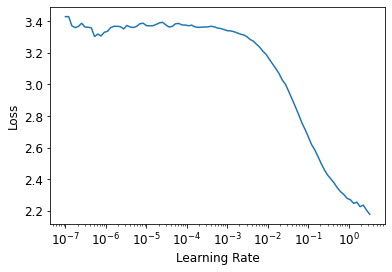

In [7]:
learn_net18 = cnn_learner(dls, 
                    models.resnet18, 
                    pretrained=False,
                    loss_func=CrossEntropyLossFlat(),
                    opt_func=Larc,
                    ps=0.25,
                    metrics=error_rate)

learn_net18.lr_find()

epoch,train_loss,valid_loss,error_rate,time
0,0.111924,0.098747,0.028643,00:49
1,0.064947,0.053191,0.016286,00:48
2,0.042947,0.037934,0.011286,00:48
3,0.027691,0.032777,0.009929,00:48
4,0.018559,0.024879,0.007000,00:48
5,0.009495,0.022647,0.006429,00:48


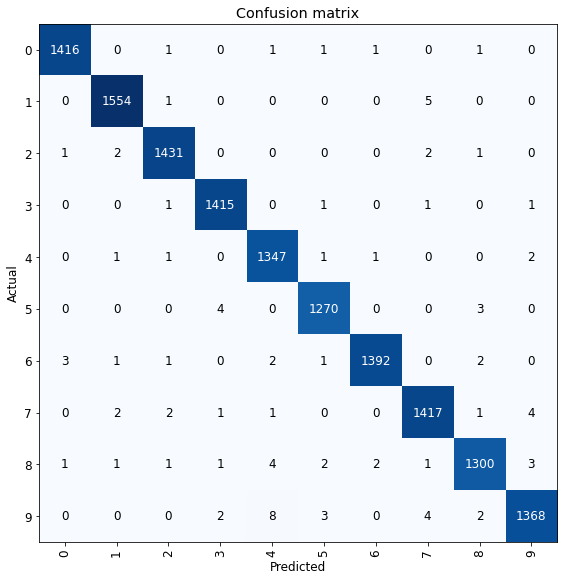

In [8]:
lr_min = 0.33113112449646
lr_steep = 0.05754399299621582
learn_net18.fit_one_cycle(6, slice(lr_min,lr_steep))

interp_net18 = ClassificationInterpretation.from_learner(learn_net18)
interp_net18.plot_confusion_matrix(figsize=(8,8))